# **TOTAL ATENUATION**

[  5.     6.     8.    10.    15.    20.    26.71  26.71  30.    31.81
  31.81  40.    50.    60.    80.   100.   150.   200.   300.  ]
[8.392e+02 5.286e+02 2.492e+02 1.381e+02 4.656e+01 2.144e+01 9.832e+00
 2.943e+01 2.182e+01 1.874e+01 3.494e+01 1.930e+01 1.067e+01 6.542e+00
 3.019e+00 1.671e+00 6.072e-01 3.246e-01 1.628e-01]


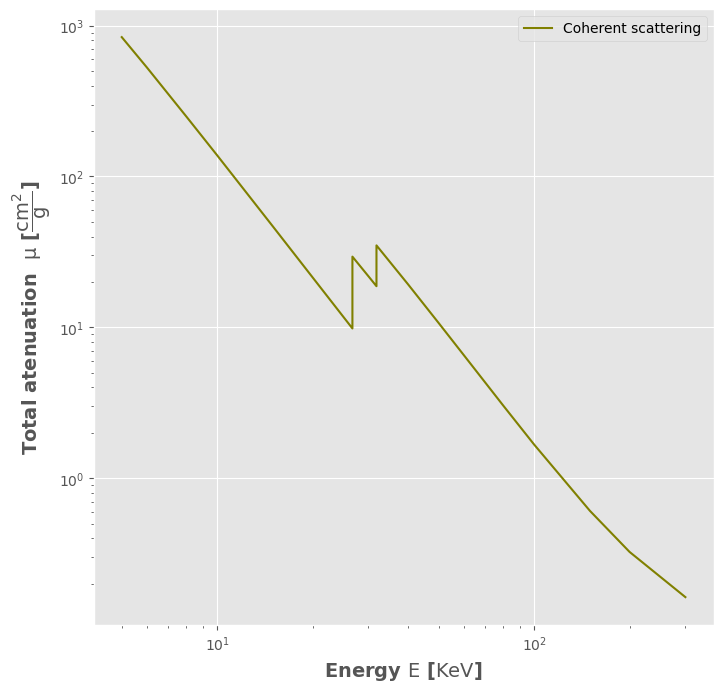

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
plt.style.use('ggplot') # ESTE ES UN ESTILO PARA TODAS LAS GRÁFICAS

#PRIMERAMENTE EXTRAEMOS LOS DATOS, EN ESTE CASO DE: https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

energy, mu = np.loadtxt("CdTe_data.txt", unpack="True", skiprows=2, usecols=(0,6)) #EXTRAEMOS LOS DATOS NECESARIOS DE LAS COLUMNAS NECESARIAS



#PARA PASAR A KEV LAS ENERGÍAS, PORQUE ESTÁN EN MeV

energy=energy*1000

print(energy)  #SE PRINTEA AMBAS PARA QUE SE VEA SI HA SALIDO BIEN
print(mu)

#REPRESENTAMOS ESTOS DATOS EN UNA GRÁFICA
plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy, mu, label='Coherent scattering', color = 'olive') 
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

# **INTERPOLATION**

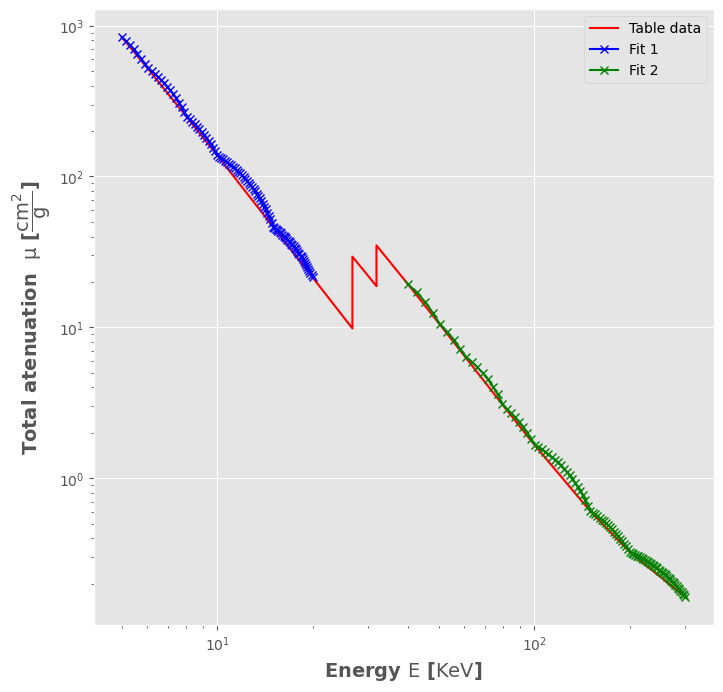

In [58]:
#AHORA LO QUE SE HACE ES LA BÚSQUEDA DE LOS DIFERENTES INTERVALOS PARA INTERPOLAR

xvals1 = np.linspace(energy[0],energy[5], 100)
yinterp1 = np.interp(xvals1, energy, mu)

xvals2 = np.linspace(energy[11],energy[-1], 100)
yinterp2 = np.interp(xvals2, energy, mu)


#CON LA PARTE DE ARIBA YA TENEMOS INTERPOLADO LOS PUNTOS DE LAS 3 REGIONES, AHORA SE PLOTEA GRÁFICAMENTE 


plt.figure(figsize=(8,8))
plt.plot(energy, mu, 'r-', label='Table data')
plt.plot(xvals1, yinterp1, 'bx-', label='Fit 1')
plt.plot(xvals2, yinterp2, 'gx-', label='Fit 2')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [59]:
# YA TENEMOS LAS REGIONES INTERPOLADAS, POR LO QUE SE SIGUE CON LA CREACIÓN DEL ARRAY DE EPUNTOS DISCRETOS QUE INTERESAN PARA LOS DEMÁS PASOS

# DEFINIMOS LOS ARRAYS DE LOS ELEMENTOS QUE QUEREMOS, SEPARANDO POR ZONAS Y QUE NO CAIGAN EN LOS CANTOS DE LAS CAPAS

x_interpolacion_1 = np.arange(5, 22, 1)
x_interpolacion_2 = np.arange(40, 250, 1)

# CREAMOS LISTAS VACÍAS PARA ALMACENAR LAS IMÁGENES

y_interpolados_1 = []
y_interpolados_2 = []

# SE DEFINE EL DEF QUE HACE LA PARTE DEL EXTRAPOLO

def interpolacion(x_interpolacion, energy, mu):
    y_interpolados = []
    for x in x_interpolacion:
        # Encontrar los índices de los puntos conocidos más cercanos a x
        indice_menor = np.argmax(energy > x) - 1
        x_menor, y_menor = energy[indice_menor], mu[indice_menor]
        x_mayor, y_mayor = energy[indice_menor + 1], mu[indice_menor + 1]

        # Realizar interpolación lineal
        y_interpolado = y_menor + (y_mayor - y_menor) * ((x - x_menor) / (x_mayor - x_menor))

        # Agregar el valor interpolado a la lista
        y_interpolados.append(y_interpolado)

    # Convertir la lista de valores interpolados a un array de NumPy
    return np.array(y_interpolados)

# Calcular interpolación para cada conjunto de datos
y_interpolados_1 = interpolacion(x_interpolacion_1,  energy, mu )
y_interpolados_2 = interpolacion(x_interpolacion_2,  energy, mu )
'''
# Calcular interpolación para cada conjunto de datos
y_interpolados_1 = interpolacion(x_interpolacion_1, x_conocidos_1, y_conocidos_1)
y_interpolados_2 = interpolacion(x_interpolacion_2, x_conocidos_2, y_conocidos_2)
y_interpolados_3 = interpolacion(x_interpolacion_3, x_conocidos_3, y_conocidos_3)
'''
# Imprimir resultados
print("Valores interpolados de y_1:")
print(y_interpolados_1)

print("\nValores interpolados de y_2:")
print(y_interpolados_2)

x_interpolacion = np.concatenate((x_interpolacion_1, x_interpolacion_2))
y_interpolacion = np.concatenate((y_interpolados_1, y_interpolados_2))

Valores interpolados de y_1:
[839.2        528.6        388.9        249.2        193.65
 138.1        119.792      101.484       83.176       64.868
  46.56        41.536       36.512       31.488       26.464
  21.44        19.71004471]

Valores interpolados de y_2:
[19.3      18.437    17.574    16.711    15.848    14.985    14.122
 13.259    12.396    11.533    10.67     10.2572    9.8444    9.4316
  9.0188    8.606     8.1932    7.7804    7.3676    6.9548    6.542
  6.36585   6.1897    6.01355   5.8374    5.66125   5.4851    5.30895
  5.1328    4.95665   4.7805    4.60435   4.4282    4.25205   4.0759
  3.89975   3.7236    3.54745   3.3713    3.19515   3.019     2.9516
  2.8842    2.8168    2.7494    2.682     2.6146    2.5472    2.4798
  2.4124    2.345     2.2776    2.2102    2.1428    2.0754    2.008
  1.9406    1.8732    1.8058    1.7384    1.671     1.649724  1.628448
  1.607172  1.585896  1.56462   1.543344  1.522068  1.500792  1.479516
  1.45824   1.436964  1.415688  1.39441

# **Efficiency**

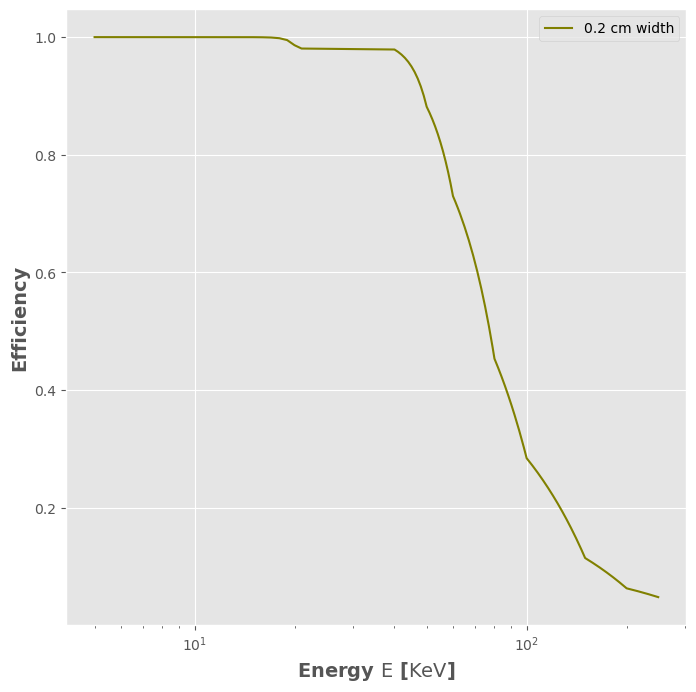

In [60]:
#AHORA CALCULAMOS LA EFICIENCIA e(E) = ( 1 - e^{- u * mu} )

energy_1 = x_interpolacion
mu_1 = y_interpolacion

x = 0.2 #GROSOR EN CM DEL DETECTOR DE CdTe

efficiency = 1 - np.e**(-x * mu_1) #FUNCIÓN DE LA EFICIENCIA

#PINTAMOS LA EFICIENCIA EN FUNCIÓN DE LA ENERGÍA

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Efficiency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, efficiency, label='0.2 cm width', color = 'olive') 
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')
plt.savefig('mission_0.2cm_continumm_sensitivity_curve.pdf', format='pdf')


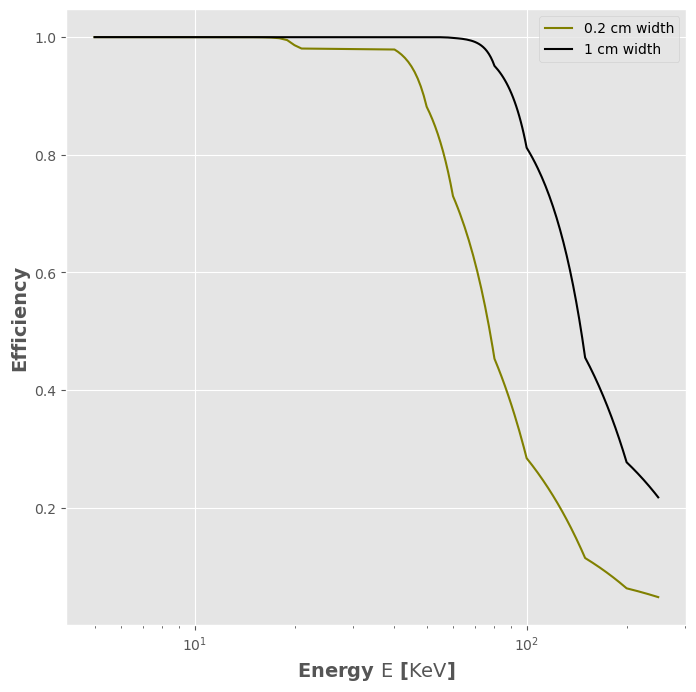

In [61]:
#AHORA CALCULAMOS LA EFICIENCIA e(E) = ( 1 - e^{- u * mu} )

energy_1 = x_interpolacion
mu_1 = y_interpolacion

x1 = 0.2
x2 = 1 #GROSOR EN CM DEL DETECTOR DE CdTe

efficiency1 = 1 - np.e**(-x1 * mu_1) #FUNCIÓN DE LA EFICIENCIA
efficiency2 = 1 - np.e**(-x2 * mu_1) #FUNCIÓN DE LA EFICIENCIA


#PINTAMOS LA EFICIENCIA EN FUNCIÓN DE LA ENERGÍA

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Efficiency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, efficiency1, label='0.2 cm width', color = 'olive') 
plt.plot(energy_1, efficiency2, label='1 cm width', color = 'black') 

plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')
plt.savefig('comparation_continumm_sensitivity_curve.pdf', format='pdf')

# **Background Noise: Aperture Leakage**

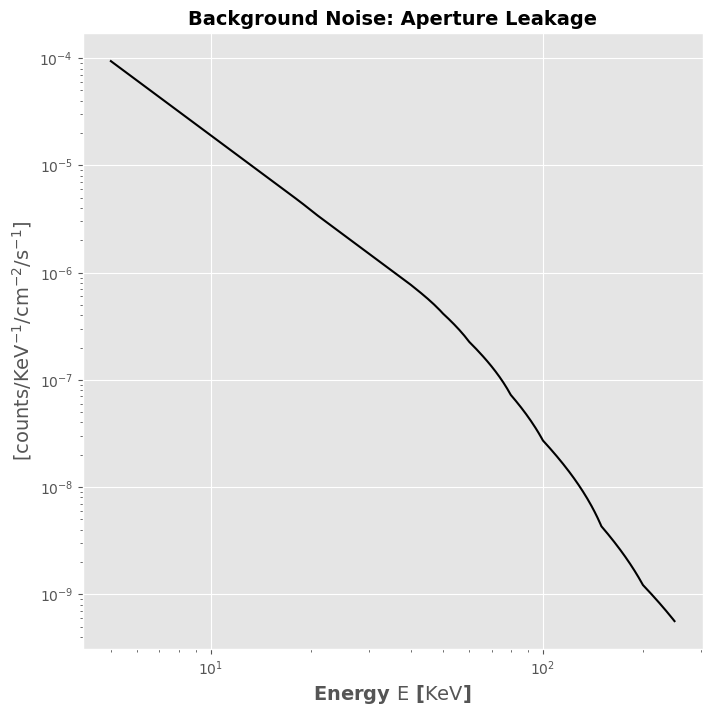

In [62]:
#AHORA CALCULAMOS EL BACKGROUND NOISE: APERTURE LEAKAGE

#DEFINIMOS LA FUNCIÓN COMO: B_{CXB}(E) = 2.75 * e(E) * E **(-2.3)
angular_resolution = 13 #numero de arcominutos que tenemos, varía mucho este backgound con este valor
rad_conversion = 0.00029088   # factor de conversión entre arcominuto y radianes
back_aperture = 84.7 * (np.pi * ( angular_resolution* rad_conversion  )**2 )* efficiency * energy_1**(-2.3)

#PINTAMOS LA BACK APERTURE EN FUNCIÓN DE LA ENERGÍA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Aperture Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[counts / KeV^{-1} / cm^{-2} / s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, color = 'black') 
plt.xscale('log')
plt.yscale('log')
#plt.legend(loc='best')
#fotones cm^-2 s^-1 KeV^-1 

# **Background Noise: Shield Leakage**

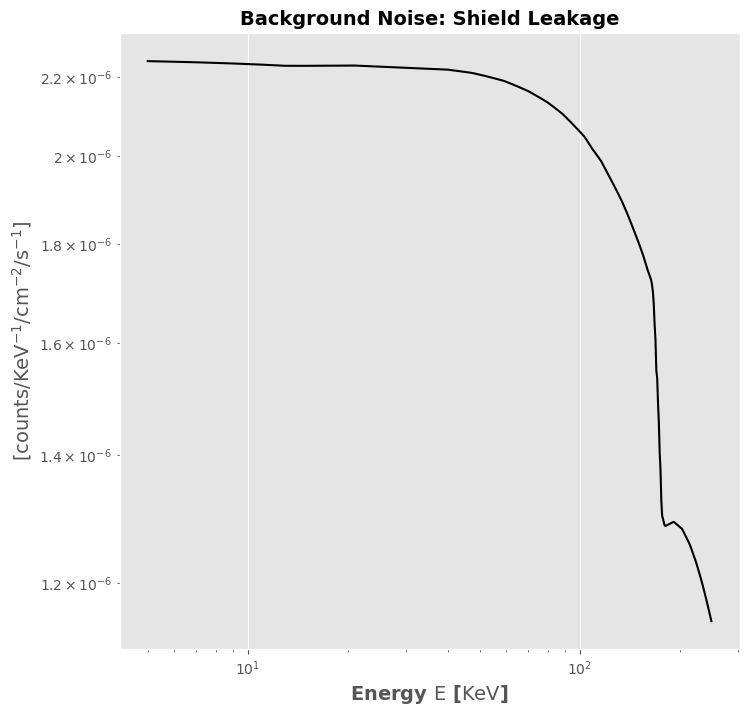

In [83]:
#AHORA EL SHIELD LEACKAGE

#PARA ESTE APARTADO HAY QUE LEER UN ARCHIVO XD

energy2, b_5cm = np.loadtxt('shield_leakage_background_CsI_Tl_5cm.txt', unpack=True)

# Datos conocidos: arrays separados para x y y
x_conocidos2 = energy2
y_conocidos2 = b_5cm

# Valores de x para la interpolación
x_interpolacion2 = energy_1


# Inicializar array para almacenar los valores interpolados de y
y_interpolados2 = []

# Iterar sobre los valores de x_interpolacion
for x in x_interpolacion2:
    # Encontrar los índices de los puntos conocidos más cercanos a x
    indice_menor = np.argmax(x_conocidos2 > x) - 1
    x_menor, y_menor = x_conocidos2[indice_menor], y_conocidos2[indice_menor]
    x_mayor, y_mayor = x_conocidos2[indice_menor + 1], y_conocidos2[indice_menor + 1]
    
    # Realizar interpolación lineal
    y_interpolado2 = y_menor + (y_mayor - y_menor) * ((x - x_menor) / (x_mayor - x_menor))
    
    # Agregar el valor interpolado a la lista
    y_interpolados2.append(y_interpolado2)

# Convertir la lista de valores interpolados a un array de NumPy
y_interpolados2 = np.array(y_interpolados2)

#print("Valores interpolados de y:")
#print(y_interpolados2)


b_5cm_new = y_interpolados2

energy_2_new = x_interpolacion2


# B_{I} = 1.22 * 10^{-3} * B_{PH5CM}(E)

#ES EL BACKGROUND ESPECTRUM PARA UN ESCUDO DE 5CM DE CsI 
shield = 5 #grosor del escudo en cm (mirar pq este dato es inventado)
area_detector =   10000  #area del detector que vamos a usar de shield
component_density = 4.59 #densidad del material que vamos a usar de shield

#0.5-2 m^^2 mas o menos el rango
sigma_shield = 1.25 #esto es de las slides
sigma_area = 825 #cm^2
NaI_density = 3.67

correction_factor = ( (x1 * area_detector * component_density) / ( sigma_shield  * sigma_area * NaI_density) )
b_i =  correction_factor * b_5cm_new * np.e**( 1 - (shield/5)) *10**(-3) # el factor de 10**-3 es para corregir unidades


plt.figure(figsize=(8,8))
plt.title('Background Noise: Shield Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[counts / KeV^{-1} / cm^{-2} / s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_2_new, b_i, color = 'black') 
plt.xscale('log')
plt.yscale('log')
#plt.legend(loc='best')

# **Background Noise: Neutron and Spallation**

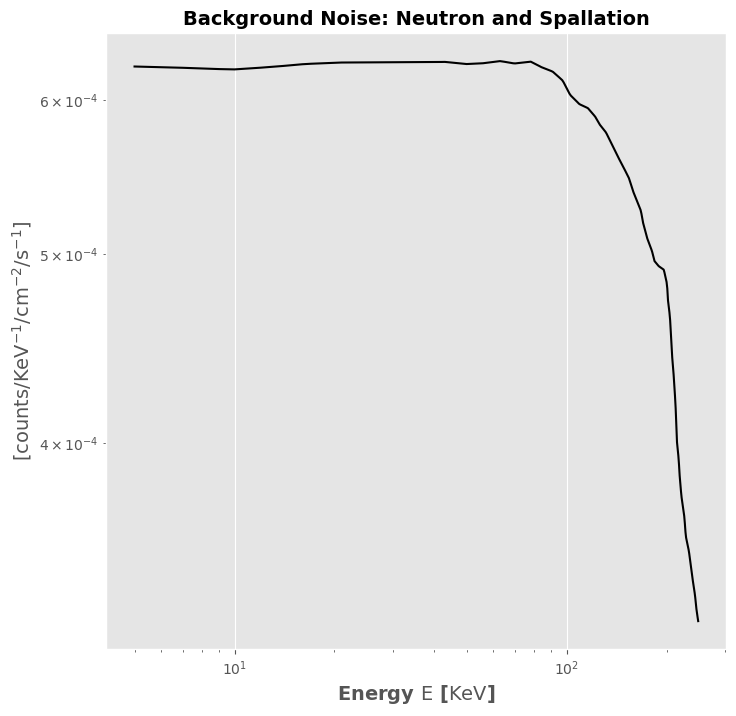

In [84]:
#AHORA ESPALLATION

energy3, b_fig = np.loadtxt('neutron_spallation_background_NaI_Tl_2cm_4p7GV.txt', unpack=True)

# Datos conocidos: arrays separados para x y y
x_conocidos3 = energy3
y_conocidos3 = b_fig

# Valores de x para la interpolación
x_interpolacion3 = energy_1

# Inicializar array para almacenar los valores interpolados de y
y_interpolados3 = []

# Iterar sobre los valores de x_interpolacion
for x in x_interpolacion3:
    # Encontrar los índices de los puntos conocidos más cercanos a x
    indice_menor = np.argmax(x_conocidos3 > x) - 1
    x_menor, y_menor = x_conocidos3[indice_menor], y_conocidos3[indice_menor]
    x_mayor, y_mayor = x_conocidos3[indice_menor + 1], y_conocidos3[indice_menor + 1]
    
    # Realizar interpolación lineal
    y_interpolado3 = y_menor + (y_mayor - y_menor) * ((x - x_menor) / (x_mayor - x_menor))
    
    # Agregar el valor interpolado a la lista
    y_interpolados3.append(y_interpolado3)

# Convertir la lista de valores interpolados a un array de NumPy
y_interpolados3 = np.array(y_interpolados3)

#print("Valores interpolados de y:")
#print(y_interpolados3)


b_fig_new = y_interpolados3

energy_3_new = x_interpolacion3

#DEFINIMOS LA FUNCION

corr_rig = 1.4   # CORRECCIÓN DE RIGIDEZ (si es LEO hay q calcular con R_C = 15.6 * L^-2, MIRAR DIBUJO RARO DE PABLO)
corr_mat = x1 / 2  # GROSOR DE LA LAMINA
b_ns = corr_rig * corr_mat * b_fig_new*10**(-3)* correction_factor


plt.figure(figsize=(8,8))
plt.title('Background Noise: Neutron and Spallation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[counts / KeV^{-1} / cm^{-2} / s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, b_ns, color = 'black') 
plt.xscale('log')
plt.yscale('log')
#plt.legend(loc='best')

# **All contributions**

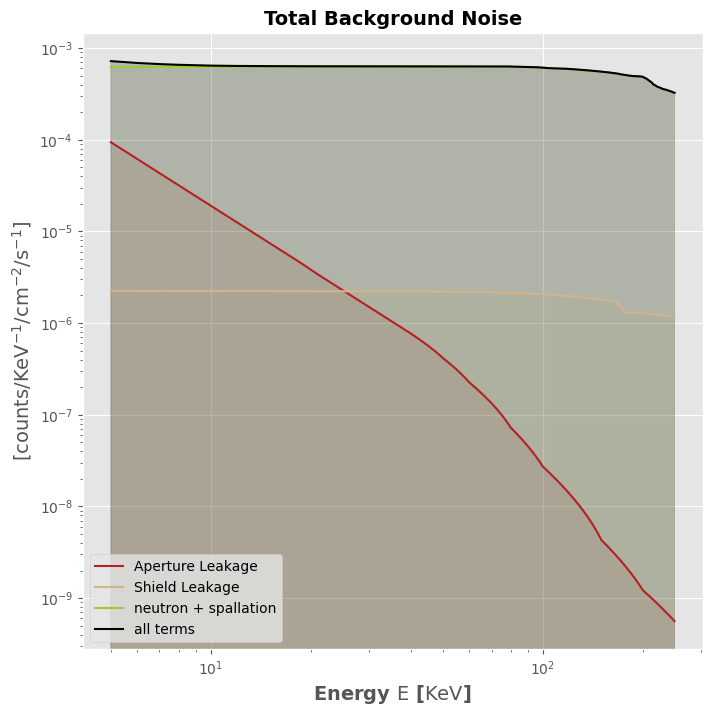

In [90]:
# PLOT TODO JUNTO

plt.figure(figsize=(8,8))
plt.title('Total Background Noise', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[counts / KeV^{-1} / cm^{-2} / s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, label='Aperture Leakage', color = 'firebrick') 
plt.plot(energy_1, b_i, label='Shield Leakage', color = 'tan') 
plt.plot(energy_1, b_ns, label='neutron + spallation', color = 'yellowgreen')
plt.plot(energy_1, b_ns + b_i + back_aperture, label='all terms', color = 'black')


plt.fill_between(energy_1, back_aperture, color = 'firebrick', alpha=0.1)
plt.fill_between(energy_1, b_i, color = 'tan', alpha=0.1)
plt.fill_between(energy_1, b_ns, color = 'yellowgreen', alpha=0.1)
plt.fill_between(energy_1,  b_ns + b_i + back_aperture, color = 'black', alpha=0.2)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.savefig('our_mission_total_background_noise.pdf', format='pdf')

# **Flux sensivility**

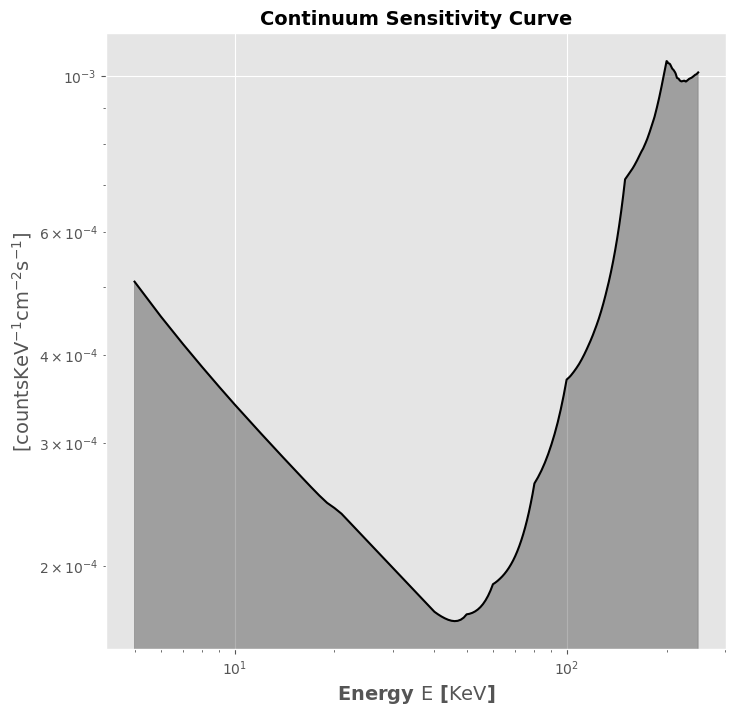

In [86]:
b_t = b_ns + b_i + back_aperture

# FUNCIÓN DE SENSIBILIDAD 
sigma = 3
A = area_detector    # ÁREA DEL SENSOR (CREO)
T = 2
f_min = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T * energy_1) )
#f_min = ((6.6*10**(-4)) / efficiency) * np.sqrt(  (4*b_t) /  energy_1  )

plt.figure(figsize=(8,8))
plt.title('Continuum Sensitivity Curve', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[counts  KeV^{-1} cm^{-2} s^{-1}]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min, 'black')
plt.fill_between(energy_1, f_min, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.savefig('our_mission_continumm_sensitivity_curve.pdf', format='pdf')
plt.show()